In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
d=pd.read_csv("/content/Mall_Customers.csv")
d

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
d.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
X = d[['Age', 'Annual_Income_(k$)']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
AgglomerativeClustering(n_clusters=4, linkage='average')



AgglomerativeClustering(linkage='average', n_clusters=4)

In [ ]:
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
y_agglo = agglo.fit_predict(X_scaled)


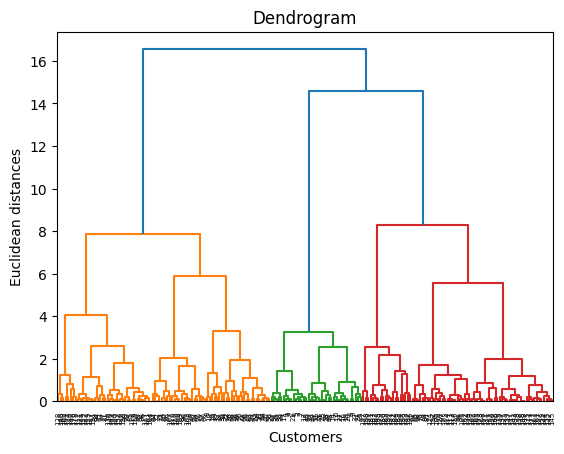

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

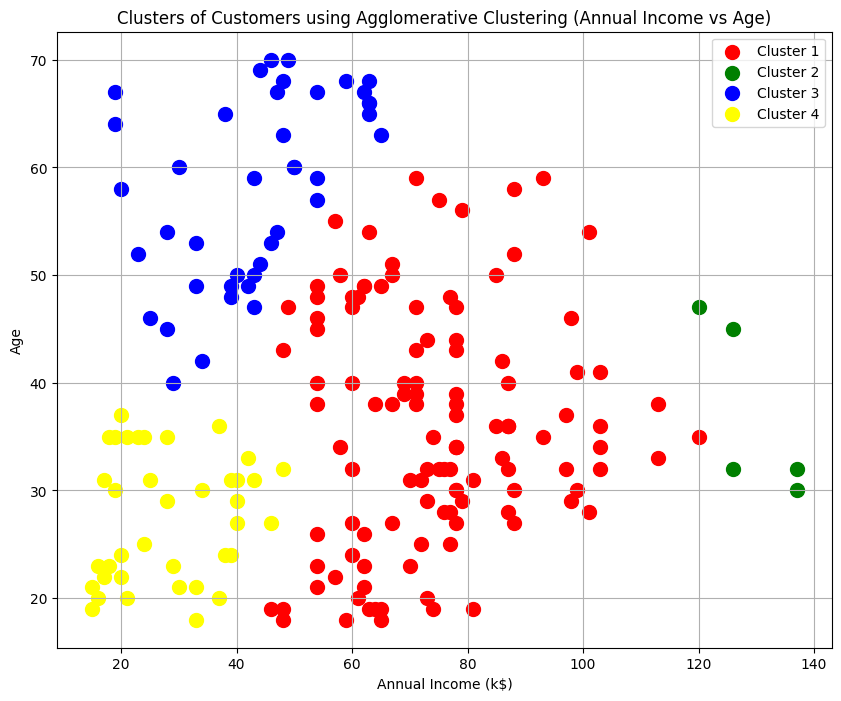

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# X-axis: Annual Income (index 1)
# Y-axis: Age (index 0)

plt.scatter(X.iloc[y_agglo == 0, 1], X.iloc[y_agglo == 0, 0], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_agglo == 1, 1], X.iloc[y_agglo == 1, 0], s=100, c='green', label='Cluster 2')
plt.scatter(X.iloc[y_agglo == 2, 1], X.iloc[y_agglo == 2, 0], s=100, c='blue', label='Cluster 3')
plt.scatter(X.iloc[y_agglo == 3, 1], X.iloc[y_agglo == 3, 0], s=100, c='yellow', label='Cluster 4')

plt.title('Clusters of Customers using Agglomerative Clustering (Annual Income vs Age)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()
